# Fuel Efficiency using ANN

In [74]:
#import the required packages

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import sklearn
import numpy as np
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
import pickle

In [75]:
physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [76]:
tf.__version__

'2.2.0'

In [77]:
data = pd.read_csv(r"D:\PROJECTS\Fuel-Efficiency-Prediction-using-ANN-main\Dataset.txt",na_values='?')

In [78]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [80]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [81]:
data.dropna(inplace=True)

In [82]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [83]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [84]:
data['car name'].unique()

array(['chevrolet chevelle malibu ', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 20

In [85]:
data.drop(['car name'],axis=1,inplace=True)

In [86]:
X=data.drop("mpg",axis=1)

In [87]:
Y=data['mpg']

In [88]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [89]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [92]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1


In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [94]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [95]:
X_train_std

array([[-0.24893345, -0.57765698, -0.02197412, ...,  0.11961844,
         0.54658592,  0.49337407],
       [ 1.52188861,  1.52787598,  1.06400983, ..., -0.55787761,
        -0.26938257, -0.74203461],
       [-0.83920747, -0.69302865, -0.17711468, ...,  0.51185299,
        -0.26938257,  1.72878276],
       ...,
       [ 0.34134057, -0.17385614,  0.15902321, ..., -1.05708522,
         1.36255441, -0.74203461],
       [ 1.52188861,  1.43173292,  1.45186124, ..., -2.6973388 ,
        -1.62933005, -0.74203461],
       [-0.83920747, -0.79878601, -0.74596341, ...,  0.44053762,
         1.36255441,  1.72878276]])

In [96]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

# saving SC transform

In [97]:
pickle.dump(sc, open(r'D:\PROJECTS\Fuel-Efficiency-Prediction-using-ANN-main\scaler3.pkl', 'wb'))

In [98]:
Y_train

274    20.3
157    15.0
173    24.0
357    32.9
263    17.7
       ... 
64     15.0
328    30.0
341    23.5
11     14.0
356    32.4
Name: mpg, Length: 313, dtype: float64

In [99]:
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
17     21.0
82     23.0
58     25.0
344    39.0
283    20.2
Name: mpg, Length: 79, dtype: float64

In [100]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [101]:
len(X_train.keys())

7

In [316]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 32,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 32,activation='relu'))

model.add(Dense(units=1))
# Adding the output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [317]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_69 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 33        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [318]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train_std, Y_train, batch_size = 50,epochs = 500)

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 619.7697 - mean_absolute_error: 23.6396 - mean_squared_error: 619.7697
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 598.9005 - mean_absolute_error: 23.1930 - mean_squared_error: 598.9005
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 577.2977 - mean_absolute_error: 22.7215 - mean_squared_error: 577.2977
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 552.1293 - mean_absolute_error: 22.1543 - mean_squared_error: 552.1293
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 518.9848 - mean_absolute_error: 21.3815 - mean_squared_error: 518.9848
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 474.5131 - mean_absolute_error: 20.3137 - mean_squared_error: 474.5131
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 415.3670 - mean_absolute_error: 18.8062 - mean_squared_error: 415.3670
Epoch 

7/7 [==============================] - 0s 2ms/step - loss: 9.3105 - mean_absolute_error: 2.2163 - mean_squared_error: 9.3105
Epoch 60/500
7/7 [==============================] - 0s 2ms/step - loss: 9.2448 - mean_absolute_error: 2.2049 - mean_squared_error: 9.2448
Epoch 61/500
7/7 [==============================] - 0s 2ms/step - loss: 9.1818 - mean_absolute_error: 2.1989 - mean_squared_error: 9.1818
Epoch 62/500
7/7 [==============================] - 0s 2ms/step - loss: 9.0851 - mean_absolute_error: 2.1838 - mean_squared_error: 9.0851
Epoch 63/500
7/7 [==============================] - 0s 2ms/step - loss: 9.0261 - mean_absolute_error: 2.1700 - mean_squared_error: 9.0261
Epoch 64/500
7/7 [==============================] - 0s 2ms/step - loss: 8.9273 - mean_absolute_error: 2.1576 - mean_squared_error: 8.9273
Epoch 65/500
7/7 [==============================] - 0s 2ms/step - loss: 8.8542 - mean_absolute_error: 2.1455 - mean_squared_error: 8.8542
Epoch 66/500
7/7 [=============================

7/7 [==============================] - 0s 3ms/step - loss: 6.5050 - mean_absolute_error: 1.8171 - mean_squared_error: 6.5050
Epoch 119/500
7/7 [==============================] - 0s 2ms/step - loss: 6.5376 - mean_absolute_error: 1.8191 - mean_squared_error: 6.5376
Epoch 120/500
7/7 [==============================] - 0s 4ms/step - loss: 6.4913 - mean_absolute_error: 1.8059 - mean_squared_error: 6.4913
Epoch 121/500
7/7 [==============================] - 0s 2ms/step - loss: 6.4612 - mean_absolute_error: 1.8036 - mean_squared_error: 6.4612
Epoch 122/500
7/7 [==============================] - 0s 2ms/step - loss: 6.4386 - mean_absolute_error: 1.8021 - mean_squared_error: 6.4386
Epoch 123/500
7/7 [==============================] - 0s 2ms/step - loss: 6.4154 - mean_absolute_error: 1.7917 - mean_squared_error: 6.4154
Epoch 124/500
7/7 [==============================] - 0s 2ms/step - loss: 6.3888 - mean_absolute_error: 1.8078 - mean_squared_error: 6.3888
Epoch 125/500
7/7 [======================

7/7 [==============================] - 0s 3ms/step - loss: 5.5604 - mean_absolute_error: 1.6863 - mean_squared_error: 5.5604
Epoch 178/500
7/7 [==============================] - 0s 15ms/step - loss: 5.6180 - mean_absolute_error: 1.6990 - mean_squared_error: 5.6180
Epoch 179/500
7/7 [==============================] - 0s 3ms/step - loss: 5.5854 - mean_absolute_error: 1.6771 - mean_squared_error: 5.5854
Epoch 180/500
7/7 [==============================] - 0s 3ms/step - loss: 5.5672 - mean_absolute_error: 1.6712 - mean_squared_error: 5.5672
Epoch 181/500
7/7 [==============================] - 0s 4ms/step - loss: 5.5551 - mean_absolute_error: 1.6684 - mean_squared_error: 5.5551
Epoch 182/500
7/7 [==============================] - 0s 3ms/step - loss: 5.5311 - mean_absolute_error: 1.6669 - mean_squared_error: 5.5311
Epoch 183/500
7/7 [==============================] - 0s 3ms/step - loss: 5.4806 - mean_absolute_error: 1.6658 - mean_squared_error: 5.4806
Epoch 184/500
7/7 [=====================

7/7 [==============================] - 0s 2ms/step - loss: 5.0473 - mean_absolute_error: 1.5800 - mean_squared_error: 5.0473
Epoch 236/500
7/7 [==============================] - 0s 2ms/step - loss: 4.9814 - mean_absolute_error: 1.5898 - mean_squared_error: 4.9814
Epoch 237/500
7/7 [==============================] - 0s 3ms/step - loss: 4.9107 - mean_absolute_error: 1.5687 - mean_squared_error: 4.9107
Epoch 238/500
7/7 [==============================] - 0s 2ms/step - loss: 4.8889 - mean_absolute_error: 1.5619 - mean_squared_error: 4.8889
Epoch 239/500
7/7 [==============================] - ETA: 0s - loss: 3.6205 - mean_absolute_error: 1.4747 - mean_squared_error: 3.62 - 0s 2ms/step - loss: 4.9019 - mean_absolute_error: 1.5730 - mean_squared_error: 4.9019
Epoch 240/500
7/7 [==============================] - 0s 2ms/step - loss: 5.0157 - mean_absolute_error: 1.5819 - mean_squared_error: 5.0157
Epoch 241/500
7/7 [==============================] - 0s 2ms/step - loss: 4.8202 - mean_absolute_er

7/7 [==============================] - 0s 2ms/step - loss: 4.3938 - mean_absolute_error: 1.4717 - mean_squared_error: 4.3938
Epoch 294/500
7/7 [==============================] - 0s 2ms/step - loss: 4.3040 - mean_absolute_error: 1.4531 - mean_squared_error: 4.3040
Epoch 295/500
7/7 [==============================] - 0s 2ms/step - loss: 4.2941 - mean_absolute_error: 1.4477 - mean_squared_error: 4.2941
Epoch 296/500
7/7 [==============================] - 0s 2ms/step - loss: 4.2810 - mean_absolute_error: 1.4490 - mean_squared_error: 4.2810
Epoch 297/500
7/7 [==============================] - 0s 2ms/step - loss: 4.2638 - mean_absolute_error: 1.4428 - mean_squared_error: 4.2638
Epoch 298/500
7/7 [==============================] - 0s 2ms/step - loss: 4.2554 - mean_absolute_error: 1.4452 - mean_squared_error: 4.2554
Epoch 299/500
7/7 [==============================] - 0s 4ms/step - loss: 4.2731 - mean_absolute_error: 1.4564 - mean_squared_error: 4.2731
Epoch 300/500
7/7 [======================

7/7 [==============================] - 0s 2ms/step - loss: 3.9132 - mean_absolute_error: 1.3711 - mean_squared_error: 3.9132
Epoch 351/500
7/7 [==============================] - 0s 3ms/step - loss: 3.9663 - mean_absolute_error: 1.3902 - mean_squared_error: 3.9663
Epoch 352/500
7/7 [==============================] - 0s 2ms/step - loss: 3.9944 - mean_absolute_error: 1.3774 - mean_squared_error: 3.9944
Epoch 353/500
7/7 [==============================] - 0s 2ms/step - loss: 4.1240 - mean_absolute_error: 1.4307 - mean_squared_error: 4.1240
Epoch 354/500
7/7 [==============================] - 0s 2ms/step - loss: 3.9346 - mean_absolute_error: 1.3848 - mean_squared_error: 3.9346
Epoch 355/500
7/7 [==============================] - 0s 2ms/step - loss: 3.9553 - mean_absolute_error: 1.3952 - mean_squared_error: 3.9553
Epoch 356/500
7/7 [==============================] - 0s 2ms/step - loss: 4.0880 - mean_absolute_error: 1.4014 - mean_squared_error: 4.0880
Epoch 357/500
7/7 [======================

7/7 [==============================] - 0s 2ms/step - loss: 3.5716 - mean_absolute_error: 1.3198 - mean_squared_error: 3.5716
Epoch 410/500
7/7 [==============================] - 0s 2ms/step - loss: 3.5176 - mean_absolute_error: 1.3032 - mean_squared_error: 3.5176
Epoch 411/500
7/7 [==============================] - 0s 2ms/step - loss: 3.5921 - mean_absolute_error: 1.3084 - mean_squared_error: 3.5921
Epoch 412/500
7/7 [==============================] - 0s 2ms/step - loss: 3.5327 - mean_absolute_error: 1.3097 - mean_squared_error: 3.5327
Epoch 413/500
7/7 [==============================] - 0s 2ms/step - loss: 3.6027 - mean_absolute_error: 1.3263 - mean_squared_error: 3.6027
Epoch 414/500
7/7 [==============================] - 0s 2ms/step - loss: 3.5329 - mean_absolute_error: 1.3040 - mean_squared_error: 3.5329
Epoch 415/500
7/7 [==============================] - 0s 2ms/step - loss: 3.5014 - mean_absolute_error: 1.3012 - mean_squared_error: 3.5014
Epoch 416/500
7/7 [======================

7/7 [==============================] - 0s 2ms/step - loss: 3.4955 - mean_absolute_error: 1.3036 - mean_squared_error: 3.4955
Epoch 468/500
7/7 [==============================] - 0s 2ms/step - loss: 3.5104 - mean_absolute_error: 1.3083 - mean_squared_error: 3.5104
Epoch 469/500
7/7 [==============================] - 0s 2ms/step - loss: 3.2768 - mean_absolute_error: 1.2495 - mean_squared_error: 3.2768
Epoch 470/500
7/7 [==============================] - 0s 2ms/step - loss: 3.2201 - mean_absolute_error: 1.2439 - mean_squared_error: 3.2201
Epoch 471/500
7/7 [==============================] - 0s 2ms/step - loss: 3.3744 - mean_absolute_error: 1.2793 - mean_squared_error: 3.3744
Epoch 472/500
7/7 [==============================] - 0s 2ms/step - loss: 3.4857 - mean_absolute_error: 1.2787 - mean_squared_error: 3.4857
Epoch 473/500
7/7 [==============================] - 0s 2ms/step - loss: 3.2521 - mean_absolute_error: 1.2677 - mean_squared_error: 3.2521
Epoch 474/500
7/7 [======================

In [319]:
model.save(r"D:\Python37\Projects\Fuel Efficiency Prediction using ANN\model")

INFO:tensorflow:Assets written to: D:\Python37\Projects\Fuel Efficiency Prediction using ANN\model\assets


In [320]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

In [321]:
prediction=model.predict(X_test_std)

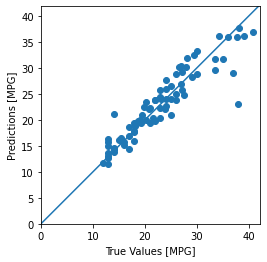

In [322]:
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [323]:
prediction

array([[13.903479],
       [18.663282],
       [19.35286 ],
       [31.750893],
       [17.674995],
       [16.004927],
       [31.808151],
       [20.052715],
       [21.008512],
       [23.995708],
       [25.832623],
       [26.57568 ],
       [29.13435 ],
       [36.085995],
       [23.823696],
       [22.150667],
       [14.323224],
       [23.86746 ],
       [12.643083],
       [16.263899],
       [27.660362],
       [20.85879 ],
       [19.332508],
       [15.749081],
       [32.45948 ],
       [28.94719 ],
       [23.437744],
       [14.365813],
       [22.510483],
       [14.639597],
       [37.60526 ],
       [36.953876],
       [31.924496],
       [29.533886],
       [30.219908],
       [22.716185],
       [24.850622],
       [16.522165],
       [11.491158],
       [30.158419],
       [30.379036],
       [24.3797  ],
       [15.198343],
       [13.080107],
       [13.618067],
       [23.877794],
       [28.268887],
       [16.096186],
       [14.969992],
       [19.785946],


In [324]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(Y_test,prediction))


RMSE:  2.838029267590068
R_square: 0.85221976630605


In [327]:
# evaluate the model
model.evaluate(X_train_std, Y_train, verbose=0)

[3.03521466255188, 1.2171094417572021, 3.03521466255188]

In [328]:
model.evaluate(X_test_std,Y_test, verbose=0)

[8.054409980773926, 1.9361587762832642, 8.054409980773926]

# Lets predict for a single car

In [329]:
list1=[[4,97.0,52.0,2130,24.6,82,2]]
list1=sc.transform(list1)
list1

array([[-0.83920747, -0.90454337, -1.34066891, -0.98136115,  3.22183717,
         1.6345439 ,  0.49337407]])

In [330]:
prediction2=model.predict(list1)

In [331]:
prediction2

array([[45.634285]], dtype=float32)

In [332]:
list2=[[8,307,130,3504,12,70,1]]
list2=sc.transform(list2)
list2

array([[ 1.52188861,  1.11446083,  0.67615842,  0.64959007, -1.27103134,
        -1.62933005, -0.74203461]])

In [333]:
prediction3=model.predict(list2)
prediction3

array([[18.186317]], dtype=float32)